# SBD2 - Análise de Dados Brutos (Camada RAW)
## Acidentes em Rodovias Federais (2024-2025)
### Análise Exploratória de Dados

## Imports das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 11

## Leitura e Consolidação dos Dados Brutos (2024-2025)

In [ ]:
# Lista de arquivos CSV por ano
anos = [2024, 2025]
dataframes = []

# Configurações de leitura para diferentes formatos
encodings = ['latin1', 'utf-8', 'ISO-8859-1']
separators = [',', ';']

# Carrega e consolida os anos selecionados
for ano in anos:
    arquivo = f'acidentes{ano}_todas_causas_tipos.csv'
    loaded = False
    
    # Tenta diferentes configurações
    for encoding in encodings:
        for sep in separators:
            try:
                df_ano = pd.read_csv(arquivo, sep=sep, encoding=encoding, low_memory=False, on_bad_lines='skip')
                # Verifica se carregou com sucesso (mais de 3 colunas)
                if len(df_ano.columns) > 3:
                    print(f'✓ {ano}: {len(df_ano):,} registros (encoding={encoding}, sep="{sep}")')
                    dataframes.append(df_ano)
                    loaded = True
                    break
            except Exception as e:
                continue
        if loaded:
            break
    
    if not loaded:
        print(f'✗ Erro ao carregar {ano}: arquivo não encontrado ou formato inválido')

# Consolida todos os dataframes
if len(dataframes) > 0:
    df = pd.concat(dataframes, ignore_index=True)
    print(f'\nTotal consolidado: {len(df):,} registros ({len(df.columns)} colunas)')
else:
    print('\n ERRO: Nenhum arquivo foi carregado com sucesso!')
    print('Verifique se os arquivos CSV estão na pasta correta.')
    print('Execute: python scripts/download_data.py')

✓ 2024: 603,215 registros (encoding=latin1, sep=";")
✓ 2025: 528,380 registros (encoding=latin1, sep=";")

📊 Total consolidado: 1,131,595 registros (37 colunas)


## Visão Geral do Dataset Consolidado

In [3]:
# Primeiras linhas
print('Amostra dos dados:')
df.head(10)

Amostra dos dados:


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Sim,...,Masculino,0.0,0.0,0.0,1.0,-22.72936,-42.701125,SPRF-RJ,DEL02-RJ,UOP03-DEL02-RJ
1,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Não,...,Feminino,1.0,0.0,0.0,0.0,-16.229185,-49.009797,SPRF-GO,DEL02-GO,UOP01-DEL02-GO
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Sim,...,Feminino,1.0,0.0,0.0,0.0,-16.229185,-49.009797,SPRF-GO,DEL02-GO,UOP01-DEL02-GO
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Sim,...,Masculino,1.0,0.0,0.0,0.0,-20.172928,-40.267364,SPRF-ES,DEL02-ES,UOP01-DEL02-ES
4,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Não,...,Masculino,1.0,0.0,0.0,0.0,-26.83477,-48.706151,SPRF-SC,DEL03-SC,UOP02-DEL03-SC
5,571778.0,1269045.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Não,...,Feminino,0.0,1.0,0.0,0.0,-26.83477,-48.706151,SPRF-SC,DEL03-SC,UOP02-DEL03-SC
6,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Sim,...,Masculino,1.0,0.0,0.0,0.0,-26.83477,-48.706151,SPRF-SC,DEL03-SC,UOP02-DEL03-SC
7,571778.0,1269045.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Sim,...,Feminino,0.0,1.0,0.0,0.0,-26.83477,-48.706151,SPRF-SC,DEL03-SC,UOP02-DEL03-SC
8,571779.0,1268998.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Sim,...,Feminino,1.0,0.0,0.0,0.0,-29.669385,-51.143047,SPRF-RS,DEL01-RS,UOP02-DEL01-RS
9,571779.0,1268999.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Sim,...,Masculino,1.0,0.0,0.0,0.0,-29.669385,-51.143047,SPRF-RS,DEL01-RS,UOP02-DEL01-RS


## Informações do Dataset

In [4]:
print('='*80)
print('INFORMAÇÕES GERAIS DO DATASET')
print('='*80)
print(f"Total de registros: {len(df):,}")
print(f"Total de colunas: {len(df.columns)}")
print(f"Período: 2024 a 2025")
print(f"Memória utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print('\n')
df.info()

INFORMAÇÕES GERAIS DO DATASET
Total de registros: 1,131,595
Total de colunas: 37
Período: 2024 a 2025
Memória utilizada: 1819.39 MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131595 entries, 0 to 1131594
Data columns (total 37 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id                      1131595 non-null  float64
 1   pesid                   1021489 non-null  float64
 2   data_inversa            1131595 non-null  object 
 3   dia_semana              1131595 non-null  object 
 4   horario                 1131595 non-null  object 
 5   uf                      1131595 non-null  object 
 6   br                      1128984 non-null  float64
 7   km                      1128984 non-null  object 
 8   municipio               1131595 non-null  object 
 9   causa_principal         1131595 non-null  object 
 10  causa_acidente          1131595 non-null  object 
 11  ordem_tipo_acidente     1131595 n

## Estatísticas Descritivas

In [5]:
df.describe()

,id,pesid,br,ordem_tipo_acidente,id_veiculo,ano_fabricacao_veiculo,idade,ilesos,feridos_leves,feridos_graves,mortos
count,1.131595e+06,1.021489e+06,1.128984e+06,1.131595e+06,1.095105e+06,1.095105e+06,925776.000000,1.021489e+06,1.021489e+06,1.021489e+06,1.021489e+06
mean,6.523186e+05,1.458516e+06,2.169304e+02,1.749175e+00,1.165963e+06,1.906569e+03,40.250026,4.105898e-01,3.416865e-01,1.277870e-01,5.389779e-02
std,4.827600e+04,1.082523e+05,1.262308e+02,9.975473e-01,8.469952e+04,4.522122e+02,43.925090,4.919411e-01,4.742753e-01,3.338526e-01,2.258160e-01
min,5.717720e+05,1.268971e+06,1.000000e+01,1.000000e+00,1.018215e+06,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.112800e+05,1.365838e+06,1.160000e+02,1.000000e+00,1.093928e+06,2.008000e+03,27.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.488000e+05,1.458184e+06,1.630000e+02,1.000000e+00,1.166501e+06,2.014000e+03,38.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.975975e+05,1.551545e+06,3.240000e+02,2.000000e+00,1.238233e+06,2.020000e+03,49.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,7.402430e+05,1.656441e+06,4.950000e+02,1.400000e+01,1.321736e+06,2.025000e+03,2024.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## ANÁLISE 1: Evolução Temporal (2024-2025)
### Comparativo entre os dois anos

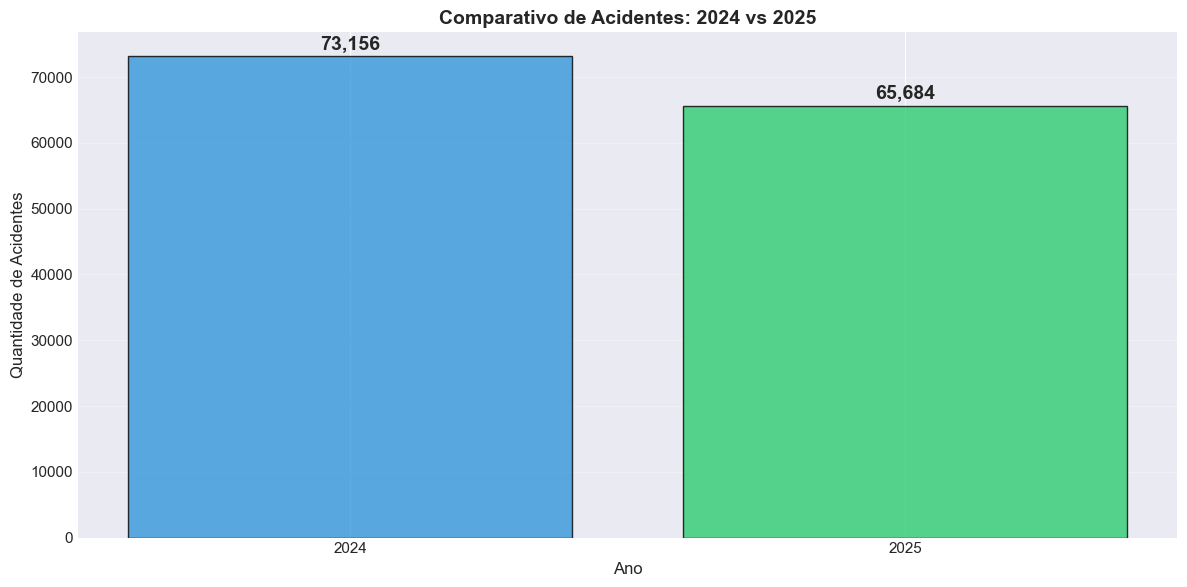


COMPARATIVO: 2024 vs 2025
Acidentes em 2024: 73,156
Acidentes em 2025: 65,684
Variação: -10.2%


In [6]:
# Converte data para datetime
df['data_dt'] = pd.to_datetime(df['data_inversa'], format='%Y-%m-%d', errors='coerce')
df['ano'] = df['data_dt'].dt.year
df['mes'] = df['data_dt'].dt.month
df['ano_mes'] = df['data_dt'].dt.to_period('M')

# Acidentes por ano
acidentes_ano = df.groupby('ano')['id'].nunique().sort_index()

# Visualização
fig, ax = plt.subplots(figsize=(12, 6))

# Cores para cada ano
cores = ['#3498db', '#2ecc71']
bars = ax.bar(acidentes_ano.index.astype(str), acidentes_ano.values, color=cores, alpha=0.8, edgecolor='black')

# Adiciona valores nas barras
for i, (ano, valor) in enumerate(acidentes_ano.items()):
    ax.text(i, valor + 1000, f'{valor:,}', ha='center', fontweight='bold', fontsize=14)

ax.set_title('Comparativo de Acidentes: 2024 vs 2025', fontsize=14, fontweight='bold')
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Quantidade de Acidentes', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Estatísticas comparativas
print('\n' + '='*80)
print('COMPARATIVO: 2024 vs 2025')
print('='*80)
if 2024 in acidentes_ano.index and 2025 in acidentes_ano.index:
    acidentes_2024 = acidentes_ano[2024]
    acidentes_2025 = acidentes_ano[2025]
    variacao = ((acidentes_2025 - acidentes_2024) / acidentes_2024) * 100
    print(f"Acidentes em 2024: {acidentes_2024:,}")
    print(f"Acidentes em 2025: {acidentes_2025:,}")
    print(f"Variação: {variacao:+.1f}%")
print('='*80)

## ANÁLISE 1.1: Evolução Mensal

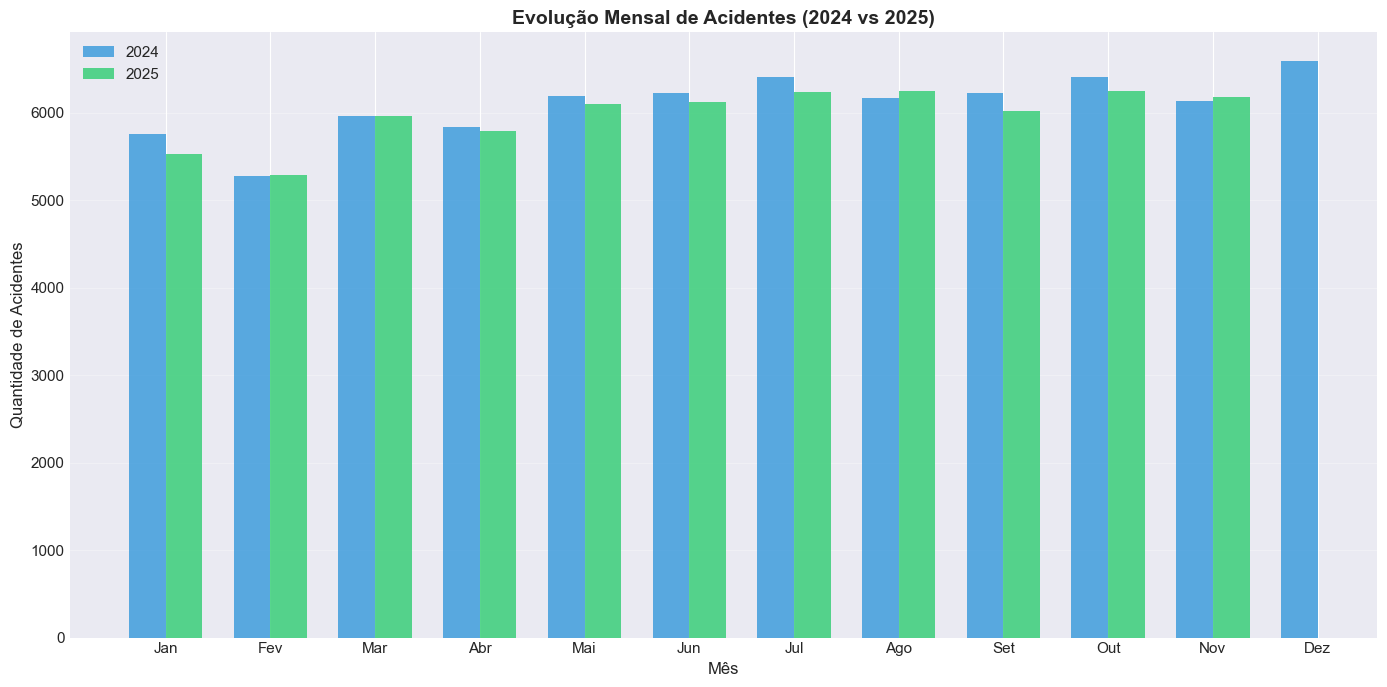

In [7]:
# Acidentes por mês e ano
acidentes_mes = df.groupby(['ano', 'mes'])['id'].nunique().unstack(level=0)

# Visualização
fig, ax = plt.subplots(figsize=(14, 7))

meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
x = np.arange(len(meses))
width = 0.35

if 2024 in acidentes_mes.columns:
    valores_2024 = [acidentes_mes[2024].get(i, 0) for i in range(1, 13)]
    ax.bar(x - width/2, valores_2024, width, label='2024', color='#3498db', alpha=0.8)

if 2025 in acidentes_mes.columns:
    valores_2025 = [acidentes_mes[2025].get(i, 0) for i in range(1, 13)]
    ax.bar(x + width/2, valores_2025, width, label='2025', color='#2ecc71', alpha=0.8)

ax.set_xlabel('Mês', fontsize=12)
ax.set_ylabel('Quantidade de Acidentes', fontsize=12)
ax.set_title('Evolução Mensal de Acidentes (2024 vs 2025)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(meses)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## ANÁLISE 2: Distribuição Geográfica (por UF)

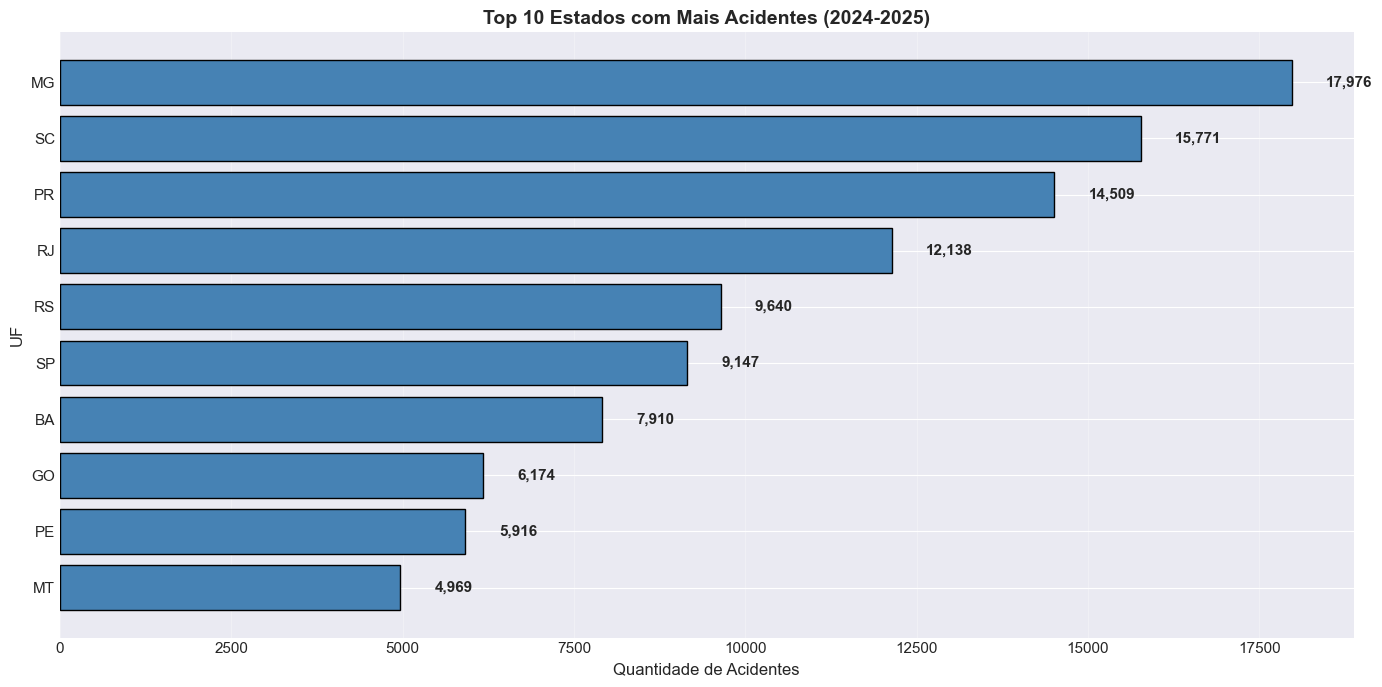


Top 10 UFs:
uf
MG    17976
SC    15771
PR    14509
RJ    12138
RS     9640
SP     9147
BA     7910
GO     6174
PE     5916
MT     4969
Name: id, dtype: int64


In [8]:
# Top 10 UFs com mais acidentes
acidentes_uf = df.groupby('uf')['id'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 7))
bars = plt.barh(acidentes_uf.index, acidentes_uf.values, color='steelblue', edgecolor='black')

# Adiciona valores nas barras
for i, (uf, valor) in enumerate(acidentes_uf.items()):
    plt.text(valor + 500, i, f'{valor:,}', va='center', fontweight='bold')

plt.title('Top 10 Estados com Mais Acidentes (2024-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade de Acidentes', fontsize=12)
plt.ylabel('UF', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print('\nTop 10 UFs:')
print(acidentes_uf)

## ANÁLISE 3: Causas de Acidentes (Top 10)

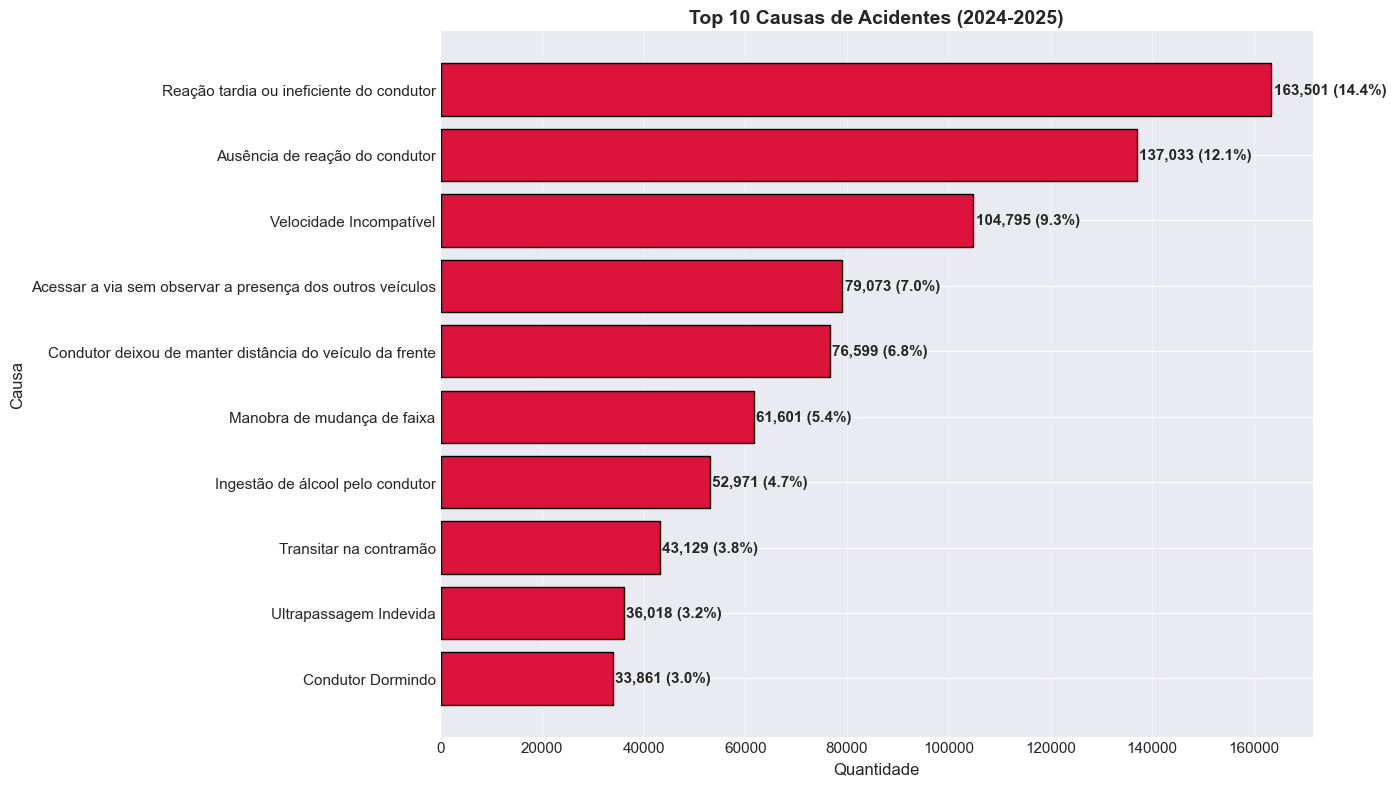


Top 10 Causas:
1. Reação tardia ou ineficiente do condutor: 163,501 (14.45%)
2. Ausência de reação do condutor: 137,033 (12.11%)
3. Velocidade Incompatível: 104,795 (9.26%)
4. Acessar a via sem observar a presença dos outros veículos: 79,073 (6.99%)
5. Condutor deixou de manter distância do veículo da frente: 76,599 (6.77%)
6. Manobra de mudança de faixa: 61,601 (5.44%)
7. Ingestão de álcool pelo condutor: 52,971 (4.68%)
8. Transitar na contramão: 43,129 (3.81%)
9. Ultrapassagem Indevida: 36,018 (3.18%)
10. Condutor Dormindo: 33,861 (2.99%)


In [9]:
# Top 10 causas de acidentes
causas = df['causa_acidente'].value_counts().head(10)

plt.figure(figsize=(14, 8))
bars = plt.barh(range(len(causas)), causas.values, color='crimson', edgecolor='black')
plt.yticks(range(len(causas)), causas.index)

# Adiciona valores
for i, valor in enumerate(causas.values):
    plt.text(valor + 500, i, f'{valor:,} ({(valor/len(df)*100):.1f}%)', va='center', fontweight='bold')

plt.title('Top 10 Causas de Acidentes (2024-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade', fontsize=12)
plt.ylabel('Causa', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print('\nTop 10 Causas:')
for i, (causa, qtd) in enumerate(causas.items(), 1):
    print(f"{i}. {causa}: {qtd:,} ({(qtd/len(df)*100):.2f}%)")

## ANÁLISE 4: Tipos de Acidentes (Top 10)

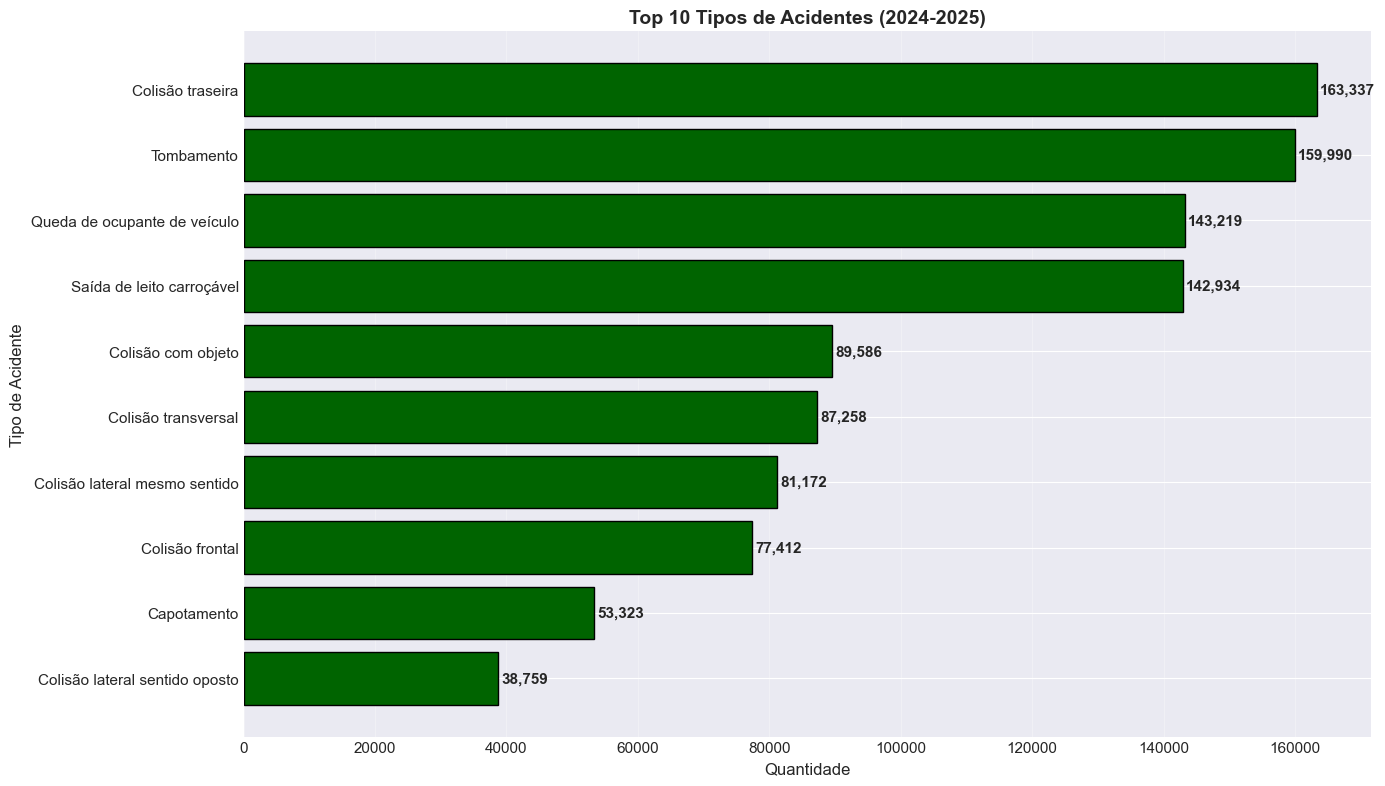

In [10]:
# Top 10 tipos de acidentes
tipos = df['tipo_acidente'].value_counts().head(10)

plt.figure(figsize=(14, 8))
bars = plt.barh(range(len(tipos)), tipos.values, color='darkgreen', edgecolor='black')
plt.yticks(range(len(tipos)), tipos.index)

# Adiciona valores
for i, valor in enumerate(tipos.values):
    plt.text(valor + 500, i, f'{valor:,}', va='center', fontweight='bold')

plt.title('Top 10 Tipos de Acidentes (2024-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade', fontsize=12)
plt.ylabel('Tipo de Acidente', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## ANÁLISE 5: Gravidade - Análise de Vítimas

ESTATÍSTICAS DE VÍTIMAS (2024-2025)
Mortos: 55,056.0
Feridos Graves: 130,533.0
Feridos Leves: 349,029.0
Ilesos: 419,413.0

Total de pessoas envolvidas: 954,031.0


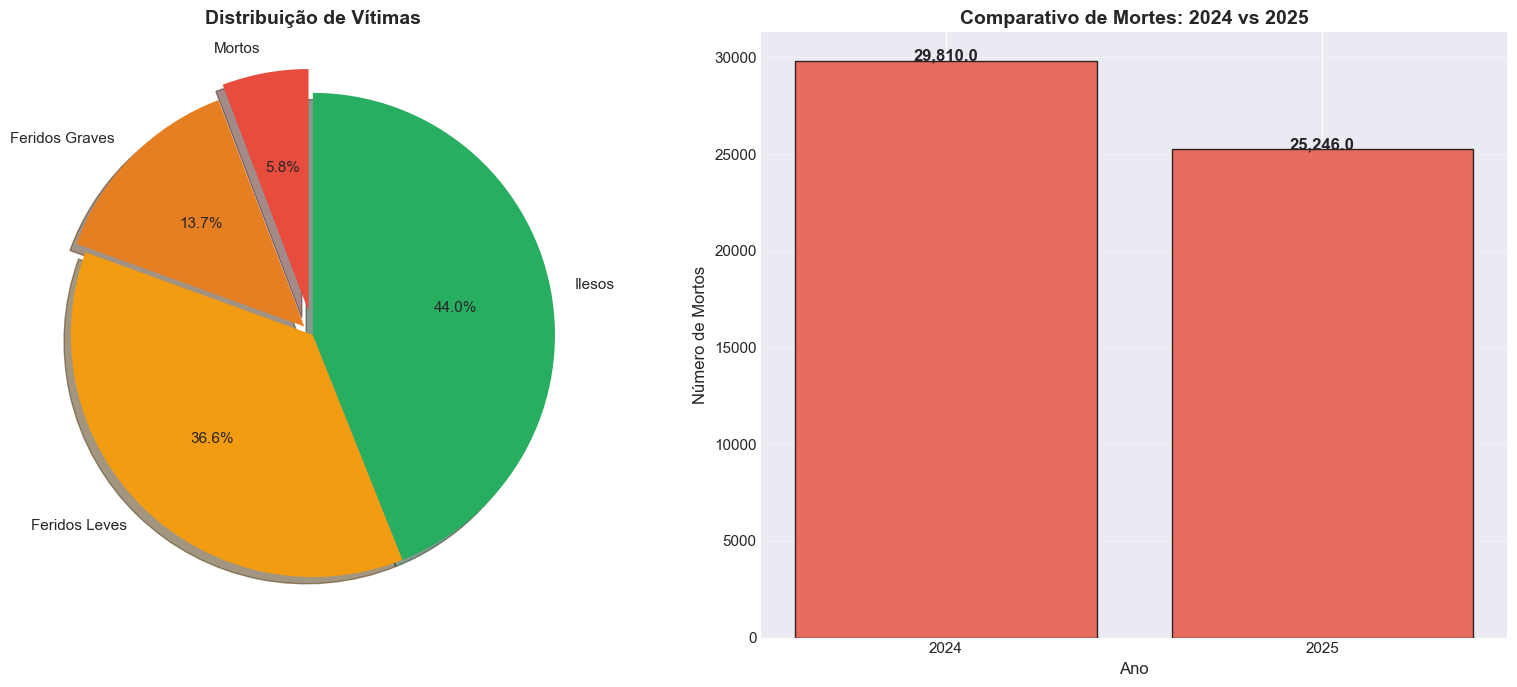

In [17]:
# Calcula totais de vítimas
total_mortos = df['mortos'].sum()
total_feridos_graves = df['feridos_graves'].sum()
total_feridos_leves = df['feridos_leves'].sum()
total_ilesos = df['ilesos'].sum()

print('='*80)
print('ESTATÍSTICAS DE VÍTIMAS (2024-2025)')
print('='*80)
print(f"Mortos: {total_mortos:,}")
print(f"Feridos Graves: {total_feridos_graves:,}")
print(f"Feridos Leves: {total_feridos_leves:,}")
print(f"Ilesos: {total_ilesos:,}")
print(f"\nTotal de pessoas envolvidas: {total_mortos + total_feridos_graves + total_feridos_leves + total_ilesos:,}")
print('='*80)

# Gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Gráfico de pizza
vitimas_data = [total_mortos, total_feridos_graves, total_feridos_leves, total_ilesos]
vitimas_labels = ['Mortos', 'Feridos Graves', 'Feridos Leves', 'Ilesos']
colors = ['#e74c3c', '#e67e22', '#f39c12', '#27ae60']
explode = (0.1, 0.05, 0, 0)

ax1.pie(vitimas_data, labels=vitimas_labels, autopct='%1.1f%%', startangle=90, 
        colors=colors, explode=explode, shadow=True)
ax1.set_title('Distribuição de Vítimas', fontsize=14, fontweight='bold')

# Gráfico de barras - evolução anual de mortos
mortos_ano = df.groupby('ano')['mortos'].sum()
ax2.bar(mortos_ano.index.astype(str), mortos_ano.values, color='#e74c3c', edgecolor='black', alpha=0.8)
for i, (ano, valor) in enumerate(mortos_ano.items()):
    ax2.text(i, valor + 20, f'{valor:,}', ha='center', fontweight='bold', fontsize=12)
ax2.set_title('Comparativo de Mortes: 2024 vs 2025', fontsize=14, fontweight='bold')
ax2.set_xlabel('Ano', fontsize=12)
ax2.set_ylabel('Número de Mortos', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## ANÁLISE 6: Tipos de Veículos Envolvidos

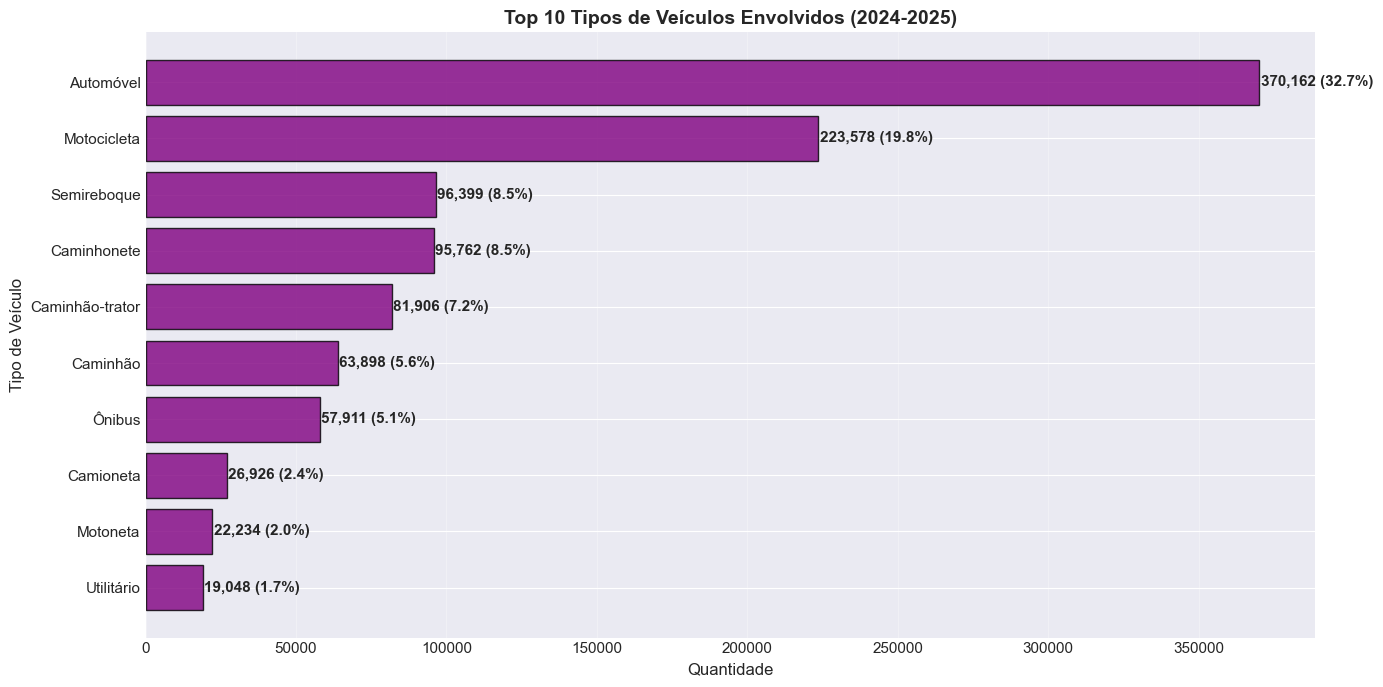

In [12]:
# Top 10 tipos de veículos
veiculos = df['tipo_veiculo'].value_counts().head(10)

plt.figure(figsize=(14, 7))
bars = plt.barh(range(len(veiculos)), veiculos.values, color='purple', edgecolor='black', alpha=0.8)
plt.yticks(range(len(veiculos)), veiculos.index)

# Adiciona valores
for i, valor in enumerate(veiculos.values):
    plt.text(valor + 500, i, f'{valor:,} ({(valor/len(df)*100):.1f}%)', va='center', fontweight='bold')

plt.title('Top 10 Tipos de Veículos Envolvidos (2024-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade', fontsize=12)
plt.ylabel('Tipo de Veículo', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## ANÁLISE 7: Condições Meteorológicas

,Condição Meteorológica,Quantidade,Percentual (%)
0,CÉU CLARO,706329,62.42
1,NUBLADO,170115,15.03
2,CHUVA,120458,10.64
3,SOL,63014,5.57
4,GAROA/CHUVISCO,45492,4.02
5,IGNORADO,12456,1.10
6,NEVOEIRO/NEBLINA,11949,1.06
7,VENTO,1757,0.16
8,GRANIZO,21,0.00
9,NEVE,4,0.00


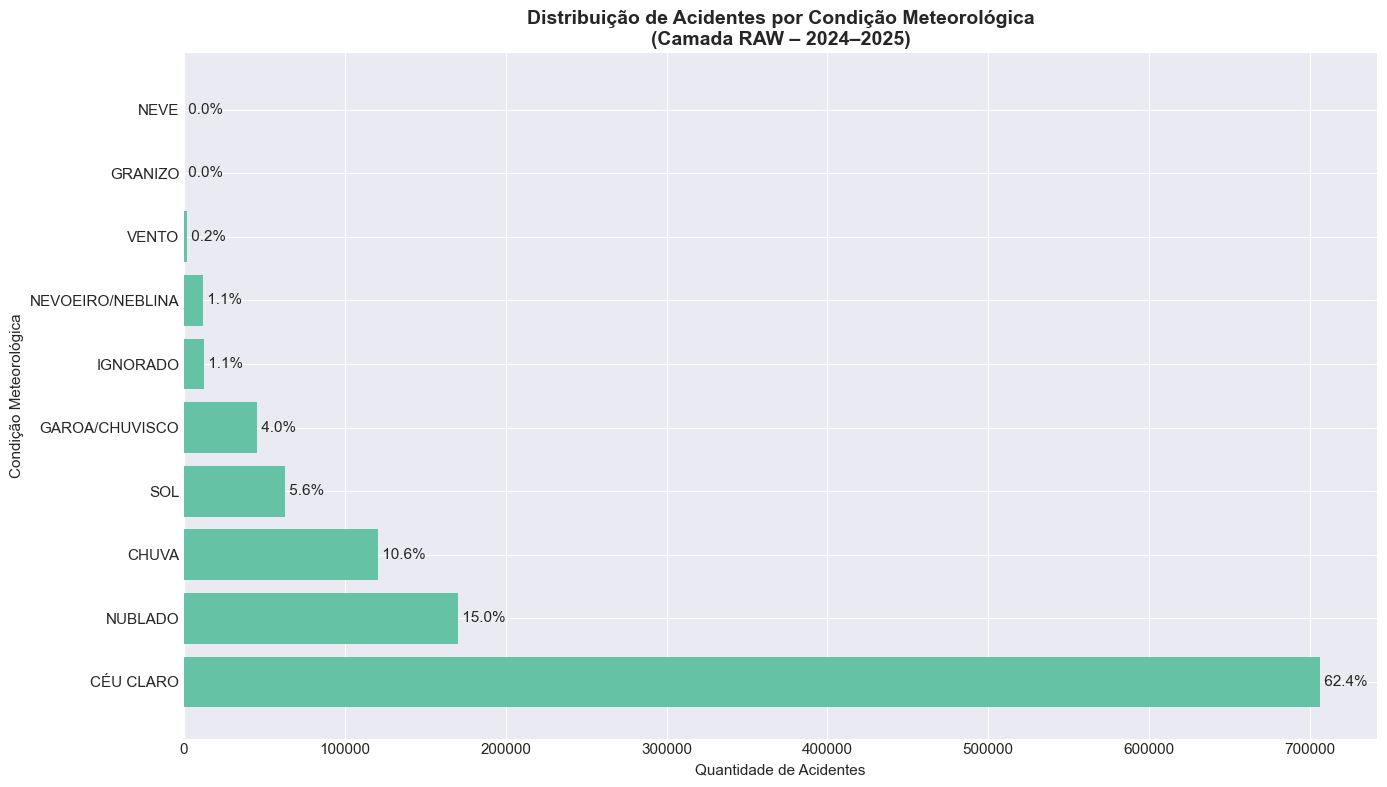

In [ ]:
# Contagem com tratamento básico
condicoes = (
    df['condicao_metereologica']
    .fillna('NÃO INFORMADO')
    .str.upper()
    .value_counts()
)

# DataFrame explícito (mais seguro)
condicoes_df = pd.DataFrame({
    'Condição Meteorológica': condicoes.index,
    'Quantidade': condicoes.values
})

# Percentual
condicoes_df['Percentual (%)'] = (
    condicoes_df['Quantidade'] / len(df) * 100
).round(2)

display(condicoes_df)

# -------------------------------
# Gráfico
# -------------------------------
plt.figure(figsize=(14, 8))

bars = plt.barh(
    condicoes_df['Condição Meteorológica'],
    condicoes_df['Quantidade']
)

plt.title(
    'Distribuição de Acidentes por Condição Meteorológica\n(Camada RAW – 2024–2025)',
    fontsize=14,
    fontweight='bold'
)
plt.xlabel('Quantidade de Acidentes')
plt.ylabel('Condição Meteorológica')

# Rótulos percentuais
for bar, pct in zip(bars, condicoes_df['Percentual (%)']):
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f' {pct:.1f}%',
        va='center'
    )

plt.tight_layout()
plt.show()


## RESUMO EXECUTIVO

In [18]:
print('\n' + '='*80)
print('RESUMO EXECUTIVO - ACIDENTES PRF 2024-2025')
print('='*80)
print(f"\n VOLUME DE DADOS:")
print(f"   Total de registros: {len(df):,}")
print(f"   Anos analisados: {sorted(df['ano'].dropna().unique().astype(int).tolist())}")
print(f"   Total de acidentes únicos: {df['id'].nunique():,}")

print(f"\n GRAVIDADE:")
print(f"   Total de mortes: {df['mortos'].sum():,}")
print(f"   Total de feridos graves: {df['feridos_graves'].sum():,}")
print(f"   Total de feridos leves: {df['feridos_leves'].sum():,}")
print(f"   Taxa de fatalidade: {(df[df['mortos'] > 0].shape[0]/len(df)*100):.2f}%")

print(f"\n DESTAQUES:")
print(f"   Estado com mais acidentes: {acidentes_uf.index[0]} ({acidentes_uf.iloc[0]:,})")
print(f"   Causa mais comum: {causas.index[0]}")
print(f"   Tipo mais comum: {tipos.index[0]}")
print(f"   Veículo mais envolvido: {veiculos.index[0]}")
print('='*80)


RESUMO EXECUTIVO - ACIDENTES PRF 2024-2025

 VOLUME DE DADOS:
   Total de registros: 1,131,595
   Anos analisados: [2024, 2025]
   Total de acidentes únicos: 138,840

 GRAVIDADE:
   Total de mortes: 55,056.0
   Total de feridos graves: 130,533.0
   Total de feridos leves: 349,029.0
   Taxa de fatalidade: 4.87%

 DESTAQUES:
   Estado com mais acidentes: MG (17,976)
   Causa mais comum: Reação tardia ou ineficiente do condutor
   Tipo mais comum: Colisão traseira
   Veículo mais envolvido: Automóvel
